In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import pandas as pd
import random
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import seaborn as sns

%matplotlib inline

Using TensorFlow backend.
C:\Users\20114\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\20114\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\20114\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\20114\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [3]:
print("Train Shape:",X_train.shape)

Train Shape: (50000, 32, 32, 3)


In [4]:
print("Test Shape:",X_test.shape)

Test Shape: (10000, 32, 32, 3)


In [5]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [6]:
y_train = pd.Series(y_train.reshape(-1,))
y_test = pd.Series(y_test.reshape(-1,))

<BarContainer object of 10 artists>

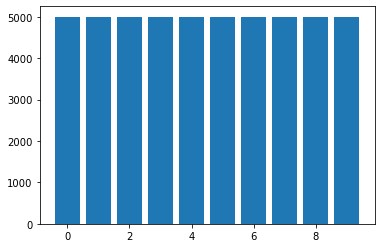

In [7]:
plt.bar(y_train.unique(),y_train.value_counts())

<BarContainer object of 10 artists>

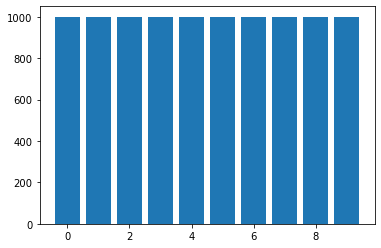

In [8]:
plt.bar(y_test.unique(),y_test.value_counts())

In [9]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [10]:
y_train.head(10)

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,1,0
9,0,0,0,1,0,0,0,0,0,0


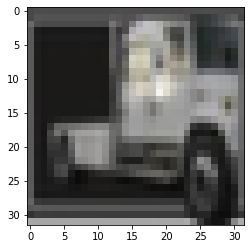

In [11]:
plt.imshow(random.choice(X_train))

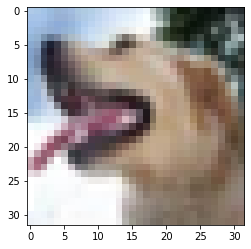

In [12]:
plt.imshow(random.choice(X_test))

In [13]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train = X_train/255.0
X_test = X_test/255.0

In [14]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='uniform'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="SGD", loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=0)

In [18]:
_, acc = model.evaluate(X_test,y_test, verbose = 0)

In [19]:
print('> %.3f' % (acc * 100.0))

> 80.210
